# Descrição do problema
Um cliente solicita que você construa um score de crédito customizado para um novo público. 
Uma amostra analítica contendo 1000 registros foi extraída do banco de dados.
O arquivo contendo a amostra de dados se encontra no seguinte endereço:
(https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data)

# Atributos do banco de dados
**Attribute 1: (qualitative)**
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

**Attribute 2: (numerical)**
Duration in month

**Attribute 3: (qualitative)**
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

**Attribute 4: (qualitative)**
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

**Attribute 5: (numerical)**
Credit amount

**Attribute 6: (qualitative)**
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

**Attribute 7: (qualitative)**
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

**Attribute 8: (numerical)**
Installment rate in percentage of disposable income

**Attribute 9: (qualitative)**
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

**Attribute 10: (qualitative)**
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

**Attribute 11: (numerical)**
Present residence since

**Attribute 12: (qualitative)**
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

**Attribute 13: (numerical)**
Age in years

**Attribute 14: (qualitative)**
Other installment plans
A141 : bank
A142 : stores
A143 : none

**Attribute 15: (qualitative)**
Housing
A151 : rent
A152 : own
A153 : for free

**Attribute 16: (numerical)**
Number of existing credits at this bank

**Attribute 17: (qualitative)**
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

**Attribute 18: (numerical)**
Number of people being liable to provide maintenance for

**Attribute 19: (qualitative)**
Telephone
A191 : none
A192 : yes, registered under the customers name

**Attribute 20: (qualitative)**
foreign worker
A201 : yes
A202 : no

**Attribute 21: (numerical)**
response variable
1: bad
2: good
O atributo binário “response variable” é a variável resposta do problema em que a
categoria “bad” representa clientes inadimplentes (maus pagadores) e “good” clientes
que pagam suas contas em dia (bons pagadores).

# A Regressão Logística
- É um modelo linear para **classificação** usando uma função dada por:
<img src="https://drive.google.com/uc?id=1YXiCkxBJ0vf8WQRjLgiw6uI-Xp2T56cZ" style='width: 300px;' />
- Onde, **para calcular s, vamos usar o coef e o intercept**
<br><br>
- Na regressão logística, ao invés de determinar um valor binário para a classe (0 ou 1, maça ou banana, fraude ou não), ela retorna **a probabilidade de um evento ocorrer**
    - Como ele calcula probabilidades, é muito usado em problemas de classificação de crédito, previsão de saída de clientes (churn) e até probabilidade de doenças
<br><br>
- Considerando uma única variável (petal width (cm)) para fazer a previsão do dataset iris [dataset model], podemos visualizar primeiramente os dados e então traçar essa função logística
<img src="https://drive.google.com/uc?id=1aSA66H2y8tiS2oVDz05BHgUhM218DcnL" style='width: 600px;' />
- Com isso, podemos fazer a previsão para qualquer novo valor
<img src="https://drive.google.com/uc?id=1lIvPbsn2PD0fPe-6m-HZnItzVh_gM0Oj" style='width: 2000px;' />

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Adicionando o conjunto de dados
dados = pd.read_table('german.txt', sep=' ')

# Adicionando o nome das colunas
dados.columns = ['checking_account', 'duration_month', 'credit_history', 'purpose', 'credit_amount', 'savings_account', 'employed_since', 'installment_rate', 'status_sex', 'other_debtors', 'residence_since', 'property', 'age', 'other_installment', 'housing', 'number_existing_credits', 'job', 'number_people_provide_maintenance', 'telephone', 'foreign_worker', 'response_variable']

display(dados)

checking_account  duration_month credit_history purpose  credit_amount  \
0                A12              48            A32     A43           5951   
1                A14              12            A34     A46           2096   
2                A11              42            A32     A42           7882   
3                A11              24            A33     A40           4870   
4                A14              36            A32     A46           9055   
..               ...             ...            ...     ...            ...   
994              A14              12            A32     A42           1736   
995              A11              30            A32     A41           3857   
996              A14              12            A32     A43            804   
997              A11              45            A32     A43           1845   
998              A12              45            A34     A41           4576   

    savings_account employed_since  installment_rate status_sex other_debtors  \
0               A61            A73                 2        A92          A101   
1               A61            A74                 2        A93          A101   
2               A61            A74                 2        A93          A103   
3               A61            A73                 3        A93          A101   
4               A65            A73                 2        A93          A101   
..              ...            ...               ...        ...           ...   
994             A61            A74                 3        A92          A101   
995             A61            A73                 4        A91          A101   
996             A61            A75                 4        A93          A101   
997             A61            A73                 4        A93          A101   
998             A62            A71                 3        A93          A101   

     ...  property age  other_installment housing number_existing_credits  \
0    ...      A121  22               A143    A152                       1   
1    ...      A121  49               A143    A152                       1   
2    ...      A122  45               A143    A153                       1   
3    ...      A124  53               A143    A153                       2   
4    ...      A124  35               A143    A153                       1   
..   ...       ...  ..                ...     ...                     ...   
994  ...      A121  31               A143    A152                       1   
995  ...      A122  40               A143    A152                       1   
996  ...      A123  38               A143    A152                       1   
997  ...      A124  23               A143    A153                       1   
998  ...      A123  27               A143    A152                       1   

      job number_people_provide_maintenance  telephone foreign_worker  \
0    A173                                 1       A191           A201   
1    A172                                 2       A191           A201   
2    A173                                 2       A191           A201   
3    A173                                 2       A191           A201   
4    A172                                 2       A192           A201   
..    ...                               ...        ...            ...   
994  A172                                 1       A191           A201   
995  A174                                 1       A192           A201   
996  A173                                 1       A191           A201   
997  A173                                 1       A192           A201   
998  A173                                 1       A191           A201   

    response_variable  
0                   2  
1                   1  
2                   1  
3                   2  
4                   1  
..                ...  
994                 1  
995                 1  
996                 1  
997                 2  
998                 1  

[99

# Análise Exploratória

In [3]:
# Analisando o tipo de dados de cada coluna
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   checking_account                   999 non-null    object
 1   duration_month                     999 non-null    int64 
 2   credit_history                     999 non-null    object
 3   purpose                            999 non-null    object
 4   credit_amount                      999 non-null    int64 
 5   savings_account                    999 non-null    object
 6   employed_since                     999 non-null    object
 7   installment_rate                   999 non-null    int64 
 8   status_sex                         999 non-null    object
 9   other_debtors                      999 non-null    object
 10  residence_since                    999 non-null    int64 
 11  property                           999 non-null    object
 12  age     

In [4]:
# Analisando os dados com pandas profiling
from ipywidgets import HTML, Button, widgets  #pip install ipywidgets
from pandas_profiling.report.presentation.core import Alerts
from pandas_profiling.report.presentation.flavours.html import templates

profile = ProfileReport(dados)

profile.to_file('analise_exploratoria.html')

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Análise Descritiva
Com a ajuda do pandas profiling, podemos observar a distribuição e variação dos dados de uma forma rápida e visual.

Algumas curiosidades sobre o dataset:

- A duração em meses possui um valor médio de 20,9 meses, variando de 4 a 72.

- A maior parte dos dados se concentram nas categorias A32 (todos os créditos antigos pagos até agora), seguido pelo A34 (situação crítica financeira em outras instituições) 

- Os propósitos são bem distríbuidos, sendo os principais radio/televisão (A43), carro novo (A40) e móveis (A42).

- A médida de quantidade de crédito é de 3273, variando de 250 a 18.424

- A grande maioria dos dados pertem a categoria A61 (< 100 DM) em se tratando de reservas financeiras (savings_account)

- Homens solteiros é a variável mais comum no dataset (A93).

- A idade varia de 19 a 75 anos, com uma média de 35,5 anos.

- A grande parte do tipo de residência é residência própria (A152)

- A maior parte das pessoas possuem um emprego formal (A173)

- Quase que a totalidade de trabalhadores não são estrangeiros (A202)

- Aproximadamente 2/3 das pessoas na base não possuem uma boa reputação de crédito (1).

In [6]:
# separando os dataframes para transformar em dummies (conversão de variáveis categóricas para número, sem considerar pesos númericos)

# célula executada apenas uma vez, se não deleta a coluna 'response_variable' e teríamos que importar e renomear novamente o arquivo

# Caso precise, só descomentar as linhas abaixo para repetir o processo.

dados = pd.read_table('german.txt', sep=' ')

dados.columns = ['checking_account', 'duration_month', 'credit_history', 'purpose', 'credit_amount', 'savings_account', 'employed_since', 'installment_rate', 'status_sex', 'other_debtors', 'residence since', 'property', 'age', 'other_installment', 'housing', 'number_existing_credits', 'job', 'number_people_provide_maintenance', 'telephone', 'foreign_worker', 'response_variable']

dados_y = dados['response_variable']
dados_x = dados.drop(dados.columns[-1], axis=1)

print(dados_x)

    checking_account  duration_month credit_history purpose  credit_amount  \
0                A12              48            A32     A43           5951   
1                A14              12            A34     A46           2096   
2                A11              42            A32     A42           7882   
3                A11              24            A33     A40           4870   
4                A14              36            A32     A46           9055   
..               ...             ...            ...     ...            ...   
994              A14              12            A32     A42           1736   
995              A11              30            A32     A41           3857   
996              A14              12            A32     A43            804   
997              A11              45            A32     A43           1845   
998              A12              45            A34     A41           4576   

    savings_account employed_since  installment_rate status_sex

In [7]:
# Convertendo os valores categoricos em numeros para usar no modelo de regressão.

# Conversão para visualizarmos o pandas profiling

dados_dummies = pd.get_dummies(dados)

profile = ProfileReport(dados_dummies)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### No arquivo acima temos as mesmas informações, mas segmentadas por variável com valores binários

##






##

In [9]:
# Convertendo valores de string para valores númericos para conseguirmos usar no modelo de Regressão.
dummies = pd.get_dummies(dados_x)

print(dummies.columns)

print(dummies)

Index(['duration_month', 'credit_amount', 'installment_rate',
       'residence since', 'age', 'number_existing_credits',
       'number_people_provide_maintenance', 'checking_account_A11',
       'checking_account_A12', 'checking_account_A13', 'checking_account_A14',
       'credit_history_A30', 'credit_history_A31', 'credit_history_A32',
       'credit_history_A33', 'credit_history_A34', 'purpose_A40',
       'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43',
       'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48',
       'purpose_A49', 'savings_account_A61', 'savings_account_A62',
       'savings_account_A63', 'savings_account_A64', 'savings_account_A65',
       'employed_since_A71', 'employed_since_A72', 'employed_since_A73',
       'employed_since_A74', 'employed_since_A75', 'status_sex_A91',
       'status_sex_A92', 'status_sex_A93', 'status_sex_A94',
       'other_debtors_A101', 'other_debtors_A102', 'other_debtors_A103',
       'property_A121', 'property_A12

### Podemos observar que agora cada variável categórica possui uma coluna própria, com 0 ou 1, indicando ausência ou presença.

### Iremos pegar esse conjunto de dados (dummies) para prever o target (dados_y)

In [11]:
# Carregando os dados em um array numpy
X = np.array(dummies.values)
y = np.array(dados_y.values)

print(X)
print(X.shape)
print(y)
print(y.shape)

[[  48 5951    2 ...    0    1    0]
 [  12 2096    2 ...    0    1    0]
 [  42 7882    2 ...    0    1    0]
 ...
 [  12  804    4 ...    0    1    0]
 [  45 1845    4 ...    1    1    0]
 [  45 4576    3 ...    0    1    0]]
(999, 61)
[2 1 1 2 1 1 1 1 2 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 2 1 1 1 1 2 1 1 1 1 1 2
 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1
 1 2 1 1 2 1 2 1 2 1 1 1 2 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 2 2 1 1 1 1 2 2 2 1 2 1
 2 1 2 1 2 2 2 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1
 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1
 1 1 1 1 2 2 1 2 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1 2 1 1 1 2 1 1
 1 1 1 2 2 1

In [12]:
# normalizando e padronizando os dados
# MinMaxScaler é usado para normalizar as variáveis, e StandardScaler é usado para padronizar
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# dados x (features) normalizados
# X = np.array(X)


# normalizando
scaler = MinMaxScaler()
scaler.fit(X)
normalized_data = scaler.transform(X)
print(normalized_data)

# Padronizando
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

print(standardized_data.shape)

X = standardized_data



[[0.64705882 0.31368989 0.33333333 ... 0.         1.         0.        ]
 [0.11764706 0.10157368 0.33333333 ... 0.         1.         0.        ]
 [0.55882353 0.41994057 0.33333333 ... 0.         1.         0.        ]
 ...
 [0.11764706 0.03048311 1.         ... 0.         1.         0.        ]
 [0.60294118 0.08776274 1.         ... 1.         1.         0.        ]
 [0.60294118 0.23803235 0.66666667 ... 0.         1.         0.        ]]
[[ 2.24755338  0.94885997 -0.86919627 ... -0.8222983   0.19611614
  -0.19611614]
 [-0.74010176 -0.41721553 -0.86919627 ... -0.8222983   0.19611614
  -0.19611614]
 [ 1.74961086  1.633138   -0.86919627 ... -0.8222983   0.19611614
  -0.19611614]
 ...
 [-0.74010176 -0.87505459  0.91932499 ... -0.8222983   0.19611614
  -0.19611614]
 [ 1.99858212 -0.50616105  0.91932499 ...  1.21610369  0.19611614
  -0.19611614]
 [ 1.99858212  0.46160866  0.02506436 ... -0.8222983   0.19611614
  -0.19611614]]
(999, 61)


Existem várias maneiras de normalizar e padronizar variáveis numéricas, cada uma com seus próprios benefícios e desvantagens.

A normalização é o processo de transformar uma variável numérica em uma escala específica, geralmente entre 0 e 1. Isso é feito subtraindo o valor mínimo da variável de cada valor e, em seguida, dividindo-o pelo intervalo (valor máximo menos valor mínimo). A fórmula para normalização é dada por:

(x - min(x)) / (max(x) - min(x))

A Padronização é o processo de transformar uma variável numérica para que tenha uma média de 0 e desvio padrão de 1. A fórmula para padronizar é:

(x - mean(x)) / std(x)

É importante notar que a normalização é apropriada quando se tem um conhecimento que os dados estão entre uma faixa específica, enquanto a padronização é mais apropriada quando se desconhece a distribuição dos dados. Ambas são utilizadas para evitar que atributos com grandes escalas dominem outros atributos com pequenas escalas. Além disso, em algumas áreas específicas, como a Rede Neural, é necessário normalizar os dados antes de treiná-los, pois algumas funções de ativação só funcionam corretamente se os dados estiverem dentro de uma determinada escala.

In [13]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)


In [14]:
# Criando o modelo
model = LogisticRegression(random_state=0,max_iter=1000)

# Treinando o modelo
model.fit(X_train, y_train)

clf2 = LogisticRegression(random_state=45,max_iter=1000).fit(X_train, y_train)

In [15]:
# Fazendo a previsão das classes
y_pred2 = clf2.predict(X_test)

In [16]:
# Avaliando o erro

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred2)

# Identificando Verdadeiros positivos (185), falso negativo (19), falso positivo (54) e verdadeiro negativo (42)

array([[185,  19],
       [ 54,  42]], dtype=int64)

In [20]:
# Avaliando o modelo 
# score = model.score(X_test, y_test)

from sklearn import metrics

score = metrics.accuracy_score(y_test, y_pred2)

print('Acurácia:', score)

# Percentagem de acerto


Acurácia: 0.7566666666666667


In [21]:
# Usando o modelo para previsão
predictions = model.predict(X_test)
print(predictions)


[1 1 2 1 1 2 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 2
 2 1 2 1 1 1 1 1 2 2 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1
 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 2
 1 1 1 1 1 2 2 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 1 1 2 1 1 1
 1 1 2 1 1 1 2 2 2 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1
 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


- **Utilizando a regressão logística**
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

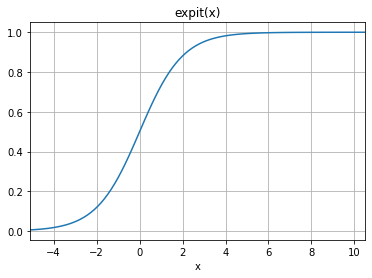

In [23]:
import matplotlib.pyplot as plt
from scipy.special import expit

x = np.linspace(X_train.min(), X_train.max(), 100)
y = expit(x)
plt.plot(x, y)
plt.grid()
plt.xlim(X_train.min(), X_train.max())
plt.xlabel('x')
plt.title('expit(x)')
plt.show()

In [24]:
# Comparando a previsão com o valor real
print('O valor de y teste é:')
print(y_test)

print('O valor do y_pred é:')
print(predictions)

O valor de y teste é:
[2 1 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 2 2 1 2 1 1 1 2
 1 1 2 1 1 1 1 1 2 2 1 1 2 2 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2 1
 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 2 1 2 2 1 1 2 1 1 1 2 1 2 1 1 1 2 1 2 1 1
 1 1 1 1 1 2 2 1 2 2 1 1 1 1 1 2 1 2 2 1 1 1 2 2 1 1 2 1 1 2 2 1 2 1 1 1 1
 1 2 2 2 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1
 1 2 2 1 1 1 2 2 1 2 1 2 2 2 2 2 1 1 1 1 2 2 2 1 1 2 1 1 1 1 2 2 2 1 2 1 1
 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 2 1 1 1 2 1 2 2 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1
 1 2 1 1]
O valor do y_pred é:
[1 1 2 1 1 2 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 2
 2 1 2 1 1 1 1 1 2 2 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1
 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 2
 1 1 1 1 1 2 2 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 

In [48]:
# Fazendo a previsão das probabilidades
proba = clf2.predict_proba(X_test)

# Probabilidade de ser um bom pagador (índice 1-- quando y é 2.)
probabilidade_bom_pagador = proba[:,1]

list(probabilidade_bom_pagador)


[0.3575544075252283,
 0.24646200250250866,
 0.5037693260003645,
 0.02497158281026338,
 0.4082282634557703,
 0.8396373573662871,
 0.03100479224973886,
 0.5643333501182854,
 0.4242181473053391,
 0.11741470925752992,
 0.017331513227658395,
 0.11632039581080272,
 0.08397560168187373,
 0.7561927547858469,
 0.7135583243294291,
 0.011459321688212348,
 0.4014154578585699,
 0.07180626182376008,
 0.22654904845058418,
 0.19910456663209714,
 0.4358859682904516,
 0.16064706315827837,
 0.06315308004853747,
 0.03921624763197009,
 0.23000329405919429,
 0.03727776191165742,
 0.23763521504374635,
 0.2765074985914869,
 0.12548629380847817,
 0.5835094740206213,
 0.7173070421756433,
 0.2591954913211902,
 0.577429168385609,
 0.30701291653610324,
 0.20932621370528703,
 0.021161840340502242,
 0.6104823106627675,
 0.9276146170465203,
 0.02483958659114614,
 0.7512586796134002,
 0.09271098278817295,
 0.23693867362439494,
 0.11671643310558112,
 0.21428413633601154,
 0.4437466419840958,
 0.6611530329661964,
 0.872

##### Ou seja, quanto mais perto a probabilidade de 1 , maior a chance de ser bom pagador

##### Valores com probabilidade acima de 0.5 são classificados como bons pagadores

##### Valores com probabilidade abaixo de 0.5 são classificados como maus pagadores

In [ ]:
#
#
#

#









#

#
#
#

### Outra forma de fazer...

- Para o caso binário, podemos calcular a curva em função do coef_ e do intercept_ fazendo `expit(x*w1+w0)`
    - https://scikit-learn.org/stable/modules/linear_model.html#binary-case

In [57]:
# Verificando o coef_
clf2.coef_
# print clf2.coef_

# e o intercept
clf2.intercept_
#print(clf2.intercept_)

# Verificando o coeficiente angular
w1 = clf2.coef_[0][0]
print('O coeficiente angular é', w1)

# E o coeficiente linear
w0 = clf2.intercept_[0]
print('O coeficiente linear é', w0)


O coeficiente angular é 0.24501134423048582
O coeficiente linear é -1.2413081399442563


- Para traçar esse gráfico, já temos a função `expit` do scipy
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html
    - `expit(x) = 1/(1+exp(-x))`

In [58]:
# Importando o expit
from scipy.special import expit

# Calculando o valor para cada valor de x e y
valores_x = np.linspace(X_train.min(),X_train.max(),100)
valores_y = expit(w1*valores_x+w0)

# Podemos exibir os dados de treino em cima dessa curva
y_curva = expit(w1*X_train+w0)
print(y_curva)

print(y_curva.shape)

[[0.19424782 0.19075467 0.15797471 ... 0.19111513 0.23267685 0.21596136]
 [0.39016257 0.27297767 0.26579497 ... 0.19111513 0.23267685 0.21596136]
 [0.23529712 0.25273044 0.18934511 ... 0.28022437 0.23267685 0.21596136]
 ...
 [0.21405734 0.20386926 0.26579497 ... 0.28022437 0.23267685 0.21596136]
 [0.28198528 0.26536054 0.18934511 ... 0.28022437 0.23267685 0.21596136]
 [0.23529712 0.19435886 0.15797471 ... 0.19111513 0.23267685 0.21596136]]
(699, 61)


- **O caso binomial pode ser estendido para quantas classses quisermos, porém há um aumento na complexidade**
    - https://scikit-learn.org/stable/modules/linear_model.html#binary-case
- **Podemos considerar todos as classes e todas as colunas**